**Realizado por**: José Javier Díaz González

**Correo**: alu0101128894@ull.edu.es

# **HUB LOCATION PROBLEMS with FIXED COSTS**

Sea $V$ el conjunto de nodos y $p$ el número de hubs a abrir. Consideramos un grafo completo $G=(V,A)$, con $|V|=n$. Denotamos la cantidad de producto que debe ir del nodo $i\in V$ al nodo $j\in V$ por $w_{ij}$. Establer un hub en el nodo $k$ tiene un costo $f_k$, y la capacidad del hub, si el problema es con capacidades, se denota por $\Gamma_k$. El costo por unidad de producto que pasa por el arco $(i,j) \in A$ es $c_{ij}$. Asumimos que los costos satisfacen la desigualdad triangular. Así mismo, en función del tramo de ruta al que corresponda un arco $(i,j)$ se aplicará un factor de proporcionalidad al costo de transporte:

*   Factor de descuento $\alpha$, $0 \le \alpha \le 1$, si el arco une dos hubs.
*   Factor de recolección $\chi$, $\chi > \alpha$, si el arco va de un nodo origen a un hub.
*   Factor de distribución $\delta$, $\delta > \alpha$, si el arco va de un hub a un nodo destino.

Los factores de distribución y recolección pueden aparerer o no en el problema, pero siempre existe un factor de descuento para el transporte entre hubs.

Notación adicional:


*   $O_i = \sum_{m\in V} w_{im}$ la demanda total que se origina en el nodo.
*   $D_i = \sum_{m\in V} w_{mi}$ la demanda con destino al nodo $i$.
*   $C_{ijkm} = \chi c_{ik} + \alpha c_{km} + \delta c_{mj}$ es el coste por unidad de producto que se envía de $i$ a $j$ a través de los hubs $k$ y $m$, en ese orden.

# **Uncapacitated Single Allocation p-Hub Location Problem (USApHLP)**

## **Modelo con variables de 4 índices.**

Definimos la variable binaria $y_{k}$ que el valor 1 si se abre un hub en $k\in V$, y 0 en otro caso. Defnimos además la variable continua $X_{ijkm}$ como la fracción de la demanda $w_{ij}$ que se manda de $i$ a $j$ a través de los hubs $k$ y $m$, en ese orden. 


Un modelo inicial para el **UMAHLP** es el siguiente:

\begin{align}
\min & \sum_{i\in V}\sum_{j\in V}\sum_{k\in V}\sum_{m\in V}w_{ij}C_{ijkm}X_{ijkm}  + \sum_{k \in V}f_k y_k\\
\mbox{s.t. } & \sum_{k \in V}\sum_{m \in V}X_{ijkm} = 1 \hspace{1cm}\forall i, j \in V \\
& X_{ijkm} <= y_{k} \hspace{1cm}\forall i, j, k, m \in V & \hspace{1cm}(2)\\
& X_{ijkm} <= y_{m} \hspace{1cm}\forall i, j, k, m \in V & \hspace{1cm}(3)\\
& y_{k} \in \{0,1\} \hspace{1cm}\forall i, j\in V, \\
& X_{ijkm} >= 0 \hspace{1cm}\forall i, j, k, m \in V.
\end{align}

Resolvamos un ejemplo con datos generados aleatoriamente.

Nodes: 15

 Matriz de distancias o costos c[i][j]:
[0, 89, 82, 27, 17, 52, 29, 83, 39, 87, 24, 30, 53, 63, 30]
[89, 0, 33, 89, 73, 44, 75, 6, 65, 80, 65, 59, 36, 67, 62]
[82, 33, 0, 92, 66, 30, 59, 33, 47, 47, 63, 57, 37, 39, 63]
[27, 89, 92, 0, 32, 62, 51, 83, 58, 107, 28, 35, 56, 82, 28]
[17, 73, 66, 32, 0, 35, 19, 67, 26, 75, 11, 15, 36, 50, 17]
[52, 44, 30, 62, 35, 0, 31, 39, 21, 53, 34, 27, 16, 31, 34]
[29, 75, 59, 51, 19, 31, 0, 70, 12, 58, 29, 28, 41, 34, 35]
[83, 6, 33, 83, 67, 39, 70, 0, 60, 79, 60, 53, 31, 64, 56]
[39, 65, 47, 58, 26, 21, 12, 60, 0, 49, 31, 28, 33, 24, 36]
[87, 80, 47, 107, 75, 53, 58, 79, 49, 0, 80, 76, 68, 25, 84]
[24, 65, 63, 28, 11, 34, 29, 60, 31, 80, 0, 7, 30, 55, 6]
[30, 59, 57, 35, 15, 27, 28, 53, 28, 76, 7, 0, 23, 51, 8]
[53, 36, 37, 56, 36, 16, 41, 31, 33, 68, 30, 23, 0, 47, 27]
[63, 67, 39, 82, 50, 31, 34, 64, 24, 25, 55, 51, 47, 0, 59]
[30, 62, 63, 28, 17, 34, 35, 56, 36, 84, 6, 8, 27, 59, 0]

 Matriz de demandas w[i][j]:
[1, 48, 49, 28, 15, 9, 9,

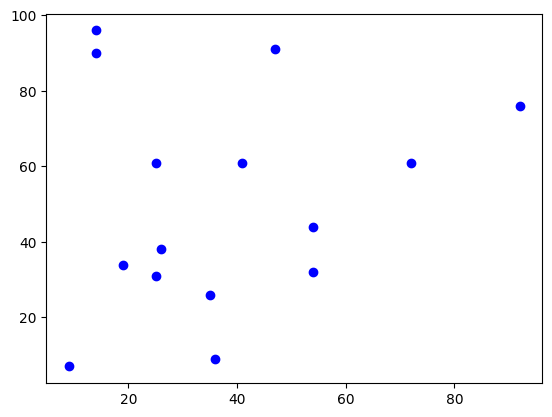

In [4]:
n = 15
nodes = range(n)

EPS     = 0.0001

fR = 1
fDES = 0.5     #alpha
fDIST = 1

print("Nodes:",n)

import random
random.seed(54613)

#Coordenadas de los nodos en el plano
nodes_coor = [(random.randint(0,100),random.randint(0,100)) for i in nodes]

import math
def euc_dist(nodes_coor, i, j):
    dx = nodes_coor[i][0] - nodes_coor[j][0]
    dy = nodes_coor[i][1] - nodes_coor[j][1]
    return math.floor(math.sqrt(dx*dx + dy*dy))

cost = [[euc_dist(nodes_coor, i, j) for j in nodes] for i in nodes] #la matriz es una lista de listas. Hacer refencia a c[i][j]

print("\n Matriz de distancias o costos c[i][j]:")
for i in cost:
    print(i)

w = [[random.randint(1,50) for j in nodes] for i in nodes] #la matriz es una lista de listas, lo que envías de un nodo a otro (de i a j)
f = [random.randint(1,50) for j in nodes] #lo que cuesta abrir hubs en i

print("\n Matriz de demandas w[i][j]:")
for ma in w:
    print(ma)

import matplotlib.pyplot as plt
def dibuja(selected):                
    plt.plot([p[0] for p in nodes_coor], [p[1] for p in nodes_coor], 'bo')
    #plt.plot([p[0] for p in facilities_coor], [p[1] for p in facilities_coor], 'rs') 
    for (i,j) in selected: #dibuja las asignaciones
        plt.plot([nodes_coor[i][0],nodes_coor[j][0]], [nodes_coor[i][1],nodes_coor[j][1]], 'g-')

    plt.show()

dibuja({})


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Costo total =  129548.0  in  16.171 seconds
Open hub in: 0
Open hub in: 1
Open hub in: 2
Open hub in: 3
Open hub in: 4
Open hub in: 5
Open hub in: 6
Open hub in: 7
Open hub in: 8
Open hub in: 9
Open hub in: 10
Open hub in: 11
Open hub in: 12
Open hub in: 13
Open hub in: 14
Nodo: 0 asignado al: 0 a través de los hubs: 0 0 
Nodo: 0 asignado al: 1 a través de los hubs: 0 1 
Nodo: 0 asignado al: 2 a través de los hubs: 0 2 
Nodo: 0 asignado al: 3 a través de los hubs: 0 3 
Nodo: 0 asignado al: 4 a través de los hubs: 0 4 
Nodo: 0 asignado al: 5 a través de los hubs: 0 5 
Nodo: 0 asignado al: 6 a través de los hubs: 0 6 
Nodo: 0 asignado al: 7 a través de los hubs: 0 7 
Nodo: 0 asignado al: 8 a través de los hubs: 0 8 
Nodo: 0 asignado al: 9 a través de los hubs: 0 9 
Nodo: 0 asignado al: 10 a través de los hubs: 0 10 
Nodo: 0 asignado al: 11 a través de los hubs: 0 11 
Nodo: 0 asignado al: 12 a través de los hubs: 0 12 
Nodo: 0 asignado al: 13 a través de los hubs: 0 13 
Nodo: 0 asignado a

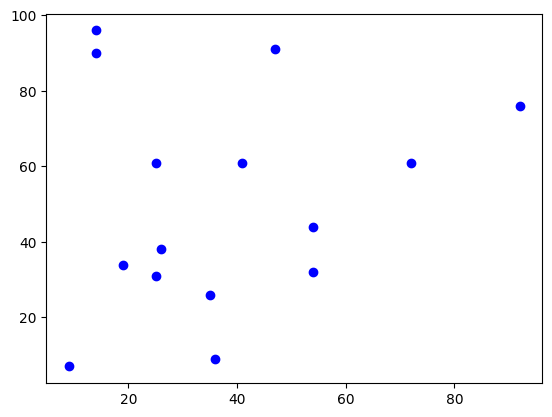

In [6]:
!pip install ortools
from ortools.linear_solver import pywraplp

#solver = pywraplp.Solver('ProblemaHLT6IndexRand', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)
solver = pywraplp.Solver('ProblemaUSApHLP3IndexRand', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)


# Variables: 
y = { k : solver.BoolVar('y[%i]' % k) for k in nodes } #binarias
x = { (i,j,k,m) : solver.NumVar(0.0, 1.0, 'x[%i, %i, %i, %i]' % (i, j, k,m)) for i in nodes for j in nodes for k in nodes for m in nodes} #continuas

#Model
solver.Minimize(solver.Sum((fR*cost[i][k] + fDES*cost[k][m] + fDIST*cost[m][j])*w[i][j]*x[i,j,k,m] for i in nodes for j in nodes for k in nodes for m in nodes)  +  solver.Sum(f[i]*y[i]  for i in nodes) )

[ solver.Add(solver.Sum(x[i,j,k,m] for k in nodes for m in nodes) == 1)  for i in nodes for j in nodes] #primera_restriccion
[ solver.Add(x[i,j,k,m]  <= y[k])  for i in nodes for j in nodes for k in nodes for m in nodes] #segunda_restriccion
[ solver.Add(x[i,j,k,m]  <= y[m])  for i in nodes for j in nodes for k in nodes for m in nodes] #tercera_restriccion

#Resolvemos el modelo
final_status = solver.Solve()

if final_status == solver.OPTIMAL:   
    # This prints the objetive value a the optimal solition
    print('Costo total = ', solver.Objective().Value() ," in ", solver.WallTime()/1000, "seconds")

    for k in nodes:
      if y[k].solution_value() > EPS:
        print('Open hub in: %d' % (k))

    for i in nodes:
        for j in nodes:
          for k in nodes:
            for m in nodes:
              if x[i, j, k, m].solution_value() > EPS  :
                print('Nodo: %d asignado al: %d a través de los hubs: %d %d ' % (i,j,k,m))

    selected = [(i,j) for i in nodes for j in nodes if x[i, j, k, m].solution_value() > EPS]
    dibuja(selected)     


elif final_status == solver.INFEASIBLE:    
  print('PROBLEMA NO FACTIBLE')      

else:
  print('LA OPTIMIZACIÓN ACABÓ CON EL STATUS:')
  print(solver_status)  